# Kaggle : New York City Taxi Trip Duration
### Share code and data to improve ride time predictions

https://www.kaggle.com/c/nyc-taxi-trip-duration/kernels

# EDA (Exploratory Data Analysis)

In [1]:
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ipyleaflet import *
from math import sin, cos, sqrt, atan2, radians
import folium
import folium.plugins as plugins
import os
from folium.plugins import MarkerCluster     # Map
from geographiclib.geodesic import Geodesic  # Map
import time, datetime                        # time data
import calendar
import scipy


%matplotlib inline

# 1 Understanding Data Set

In [2]:
taxi = pd.read_csv("train.csv")
taxi.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [6]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [8]:
taxi.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [4]:
#none of missing data
taxi1 = taxi.dropna(how = 'any')

len(taxi1) == len(taxi)

True

## 1.1 Data Set Structure

NYC Taxi Trip Duration [Train Set]은

총 1,458,644 Row와 11 Column으로 구성되어 있으며,

Missing Data는 존재하지 않습니다.

## 1.2 Column Explanation

- id : 개별 Taxi에 부여된 고유 id (이건 그냥 쓴거예요...)
- verdor_id : Taxi Company id >>>  1, 2로 구성되어 있는걸로 봐서 2개의 회사를 대상
- pickup/dropoff datetime : 출발/도착 시간정보 >> 년, 월, 일, 시각 정보가 포함
- passenger_count : 승객수 >>> 0~9명까지 존재
- pickup/dropoff_longitude & latitude : 출발/도착 지리정보
- store_and_fwd_flag : whether the trip data was sent immediately to the vendor (“N”) or held in the memory of the taxi because there was no connection to the server (“Y”)
- trip_duration : 탑승시간 >>> 단위는 Seconds

## 1.3 Datetime 다루기

datetime은 pd.to_datetime method(?)를 사용해야 datetime에서 년, 월, 일 Data를 활용할 수 있다

In [5]:
# Pickup/Dropoff_Datetime Datatype 변경

taxi1['pickup_datetime'] = pd.to_datetime(taxi['pickup_datetime'])
taxi1['dropoff_datetime'] = pd.to_datetime(taxi['dropoff_datetime'])
taxi1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 133.5+ MB


In [6]:
#day of week
#date by month
taxi1["pick_month"] = taxi1["pickup_datetime"].dt.month.astype("int")
taxi1["drop_month"] = taxi1["dropoff_datetime"].dt.month.astype("int")

#Monday=0, Sunday=6
taxi1["pick_week"] = taxi1["pickup_datetime"].dt.dayofweek.astype("int")
taxi1["drop_week"] = taxi1["dropoff_datetime"].dt.dayofweek.astype("int")

#date by hour
taxi1["pick_hour"] = taxi1["pickup_datetime"].dt.hour.astype("int")
taxi1["drop_hour"] = taxi1["dropoff_datetime"].dt.hour.astype("int")

### 1.4 Sampling

In [7]:
np.random.seed(0)
taxi_sample = taxi.sample(frac=0.001, replace=True)
taxi_sample.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
305711,id3155472,2,2016-03-03 21:49:00,2016-03-03 21:55:27,2,-74.005898,40.736099,-73.995026,40.749981,N,387
117952,id1634041,1,2016-03-04 08:18:24,2016-03-04 08:32:05,1,-73.982277,40.765305,-73.973473,40.757809,N,821
963395,id2047807,1,2016-01-03 10:46:02,2016-01-03 11:02:37,1,-73.994186,40.755886,-74.016571,40.704746,N,995
152315,id3416393,1,2016-03-12 20:53:19,2016-03-12 20:55:41,1,-73.985619,40.757359,-73.987984,40.757030,N,142
359783,id1130068,2,2016-06-14 22:18:19,2016-06-14 22:29:42,1,-73.872879,40.774052,-73.925018,40.759640,N,683


# 2 개별 요소 시각화

## 2.1 Interactive Map Visualization

In [19]:
# pick location and count data on the map
# center location
center=[np.mean(taxi['pickup_latitude']), np.mean(taxi['pickup_longitude'])]

m = folium.Map(
    location = center,
    zoom_start=9)

marker_cluster = MarkerCluster(
    name='1000 clustered icons',
    overlay=True,
    control=False,
    icon_create_function=None
)

for i in range(len(taxi_sample)):
    location1=[taxi_sample.iloc[i, 6], taxi_sample.iloc[i, 5]]
    folium.CircleMarker(
        location=location1,
        radius=1,
        color = "blue"
      ).add_to(m)
    marker = folium.Marker(location=location1)
    marker_cluster.add_child(marker)
    marker_cluster.add_to(m)
    
m

샘플링 후 위치정보를 확인해보면 

대부분의 위치정보가 Mahattan에 위치해 있으며, 그외에 특이지역은 LaGuardia Airport와 JFK Airport로 나타난다.

## 2.2 Indivisual Feature Visualization

AttributeError: module 'seaborn' has no attribute 'show'

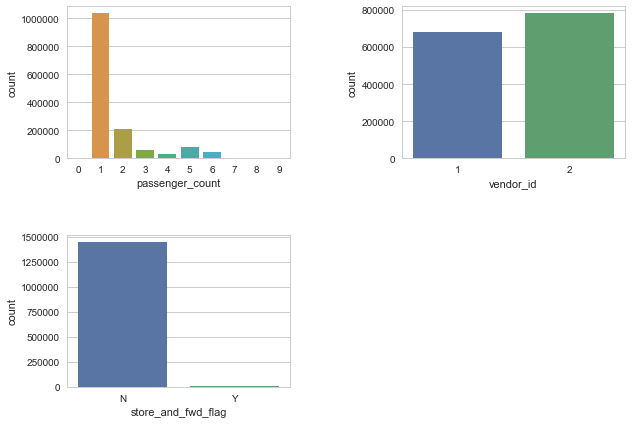

In [15]:
fig = plt.figure(figsize=(10,7))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

ax1 = fig.add_subplot(221)
data1 = taxi.groupby('passenger_count').aggregate({'id':'count'}).reset_index()
sns.barplot(x='passenger_count', y='id', data=data1, ax=ax1)
plt.ylabel('count')

ax2 = fig.add_subplot(222)
data2 = taxi.groupby('vendor_id').aggregate({'id':'count'}).reset_index()
sns.barplot(x='vendor_id', y='id', data=data2, ax=ax2)
plt.ylabel('count')

ax3 = fig.add_subplot(223)
data3 = taxi.groupby('store_and_fwd_flag').aggregate({'id':'count'}).reset_index()
sns.barplot(x='store_and_fwd_flag', y='id', data=data3, ax=ax3)
plt.ylabel('count')


sns.show()

In [ ]:
- Passenger는 대부분 1명이 (퍼센트구해주세요)로 대부분을 이루며, 0명 데이터와 7~9명 데이터도 65개 존재
- Vendor는 비슷하게 존재
- store and fwd flag : (대충이라도 설명필요)
    
(왜 이게 Warning 뜨는지 모르겠네요 ㅋㅋㅋ)

In [52]:
df2 = pd.DataFrame(taxi1, columns=["passenger_count", "pick_hour", "pick_week", "trip_duration", "count"])
df2 = df2.groupby(["passenger_count", "pick_hour", "pick_week"]).size().reset_index(name='count')
df2.tail(5)

,passenger_count,pick_hour,pick_week,count
1055,7,10,1,1
1056,7,19,5,1
1057,7,22,6,1
1058,8,1,4,1
1059,9,8,4,1


In [53]:
passenger_pivot1 = df2.pivot_table(values='count', index=["pick_hour"], columns=["pick_week"], aggfunc=np.sum)
passenger_pivot1.fillna(value=0)

pick_week,0,1,2,3,4,5,6
pick_hour,,,,,,,
0,4299,4506,5327,6299,8779,11768,12270
1,2578,2574,3134,3632,5804,9989,10860
2,1658,1508,1890,2145,3949,8240,8582
3,1226,1012,1280,1550,2924,6037,6866
4,1351,1142,1252,1385,2313,3849,4500
5,2147,2126,2087,2222,2461,1997,1962
6,5357,5779,5833,6051,5544,2535,2149
7,8620,10050,10344,10408,9607,3727,2844
8,10342,11608,11889,11936,11465,5480,4333


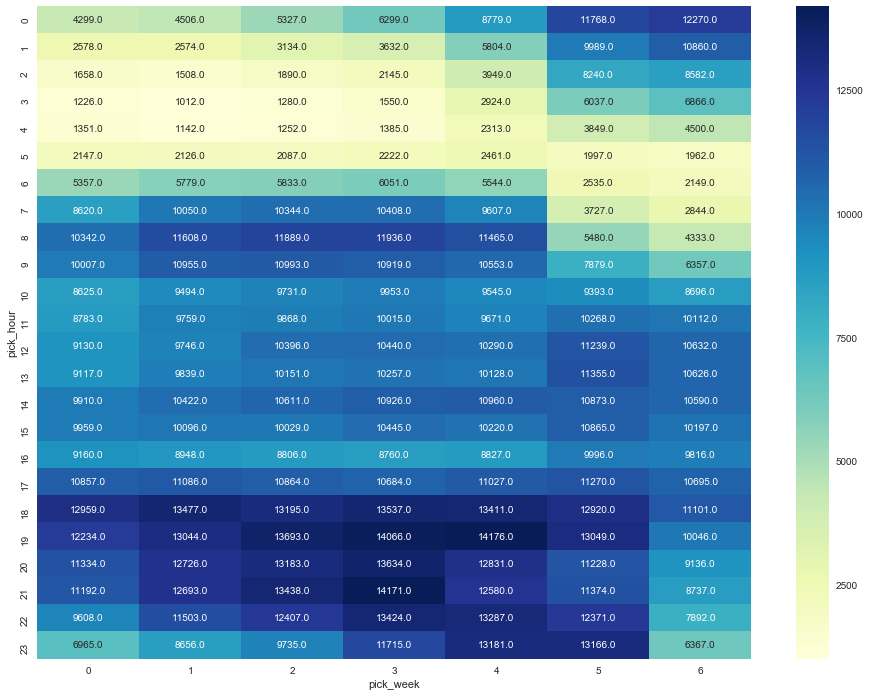

In [54]:
plt.figure(figsize=(16, 12))
sns.heatmap(passenger_pivot1, cmap="YlGnBu", annot=True, fmt=".1f")

## 2.3 Latitude & Longitude Visualization 

(샘플아니고 전체 데이터로 하면 이렇게 됨)
2X2로 해서 표현하면 더 보기 좋을 것 같아요...

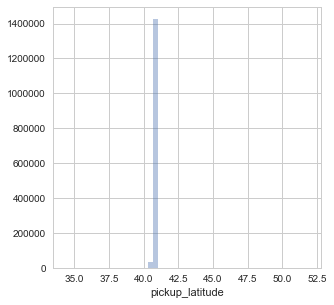

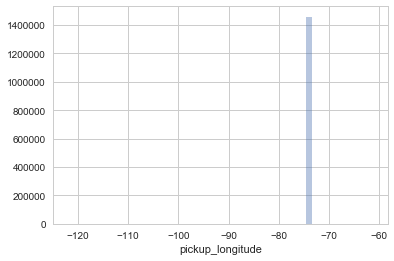

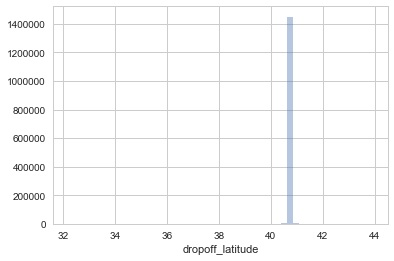

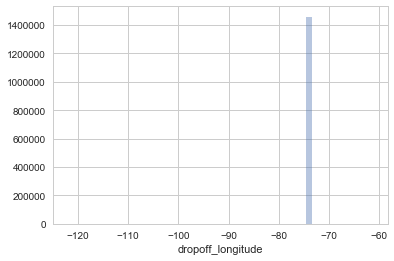

In [8]:
#taxi location latitude, longitude distribution
fig = plt.figure(figsize=(12,12))
fig.subplots_adjust(wspace=0.5, hspace=0.5)

ax1 = fig.add_subplot(221)
sns.distplot(taxi["pickup_latitude"], kde=False);
plt.xlabel('pickup_latitude')
plt.show()

ax2 = fig.add_subplot(222)
sns.distplot(taxi["pickup_longitude"], kde=False);
plt.xlabel('pickup_longitude')
plt.show()

ax3 = fig.add_subplot(223)
sns.distplot(taxi["dropoff_latitude"], kde=False);
plt.xlabel('dropoff_latitude')
plt.show()

ax4 = fig.add_subplot(224)
sns.distplot(taxi["dropoff_longitude"], kde=False);
plt.xlabel('dropoff_longitude')

plt.show()

## 2.4 Trip_Duration Visualization   
(샘플아니고 전체 데이터로 하면 이렇게 됨)

ValueError: Unknown scale type 'sqrt'

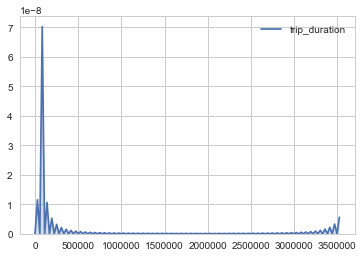

In [9]:
#duration
ax4 = sns.kdeplot(taxi["trip_duration"], shade=True);
ax4.set(xscale= 'log', yscale= 'sqrt')
sns.show()

# 3 Feature Relations

## 3.1 Dtae Time & Trip Duration

### 3.1.1 Month & Trip Duration

In [16]:
taxi_month = pd.DataFrame(taxi1, columns=['vendor_id', 'pick_month','trip_duration'])
taxi_month = taxi_month.groupby(['vendor_id', 'pick_month']).agg('median').reset_index() 

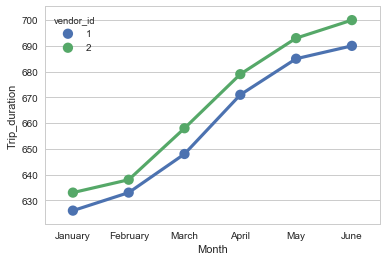

In [27]:
sns.pointplot(x=taxi_month['pick_month'], y=taxi_month['trip_duration'], hue = taxi_month['vendor_id'], data=taxi_month)
plt.xlabel('Month')
plt.xticks(range(0,6), calendar.month_name[1:7])
plt.ylabel('Trip_duration')

plt.show()

1월과 6월을 비교했을 때 1분정도 median이 차이가 난다.
계절적인 요인은 확실히 있는 것 같다.

### 3.1.2 Week & Trip Duration

In [37]:
taxi_week = pd.DataFrame(taxi1, columns=['vendor_id', 'pick_week','trip_duration'])
taxi_week = taxi_week.groupby(['vendor_id', 'pick_week']).agg('median').reset_index() 

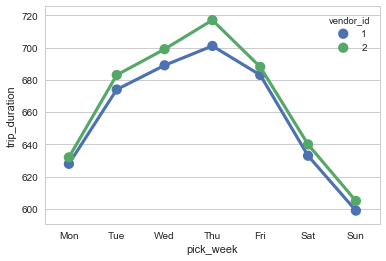

In [40]:
sns.pointplot(x=taxi_week['pick_week'], y=taxi_week['trip_duration'], hue = taxi_week['vendor_id'], data=taxi_week)
plt.xlabel('pick_week')
plt.xticks(taxi_week['pick_week'], ('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.ylabel('trip_duration')
plt.show()

### 3.1.3 hours & Trip Duration

In [43]:
taxi_time = pd.DataFrame(taxi1, columns=['vendor_id', 'pick_hour','trip_duration'])
taxi_time = taxi_time.groupby(['vendor_id', 'pick_hour']).agg('median').reset_index()

In [ ]:
taxi_time ### 시간대별 평균 trip_duration

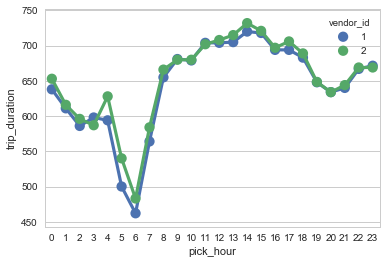

In [46]:
sns.pointplot(x=taxi_time['pick_hour'], y=taxi_time['trip_duration'], hue = taxi_time['vendor_id'], data=taxi_time)
plt.xlabel('pick_hour')
plt.ylabel('trip_duration')

plt.show()

In [ ]:
시간에 따른 trip duration을 살펴보면 업무시간대인 8~17시까지 Duration이 높게 나왔다.

## 3.5 Distance

In [49]:
# approximate radius of earth in km
R = 6371.0

dist = []

for i in range(len(taxi1)):
    lat1 = radians(taxi1.iloc[i,6])
    lon1 = radians(taxi1.iloc[i,5])
    lat2 = radians(taxi1.iloc[i,8])
    lon2 = radians(taxi1.iloc[i,7])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    dist.append(distance)
    
taxi1['distance'] = dist

AttributeError: 'JointGrid' object has no attribute 'set_ysacle'

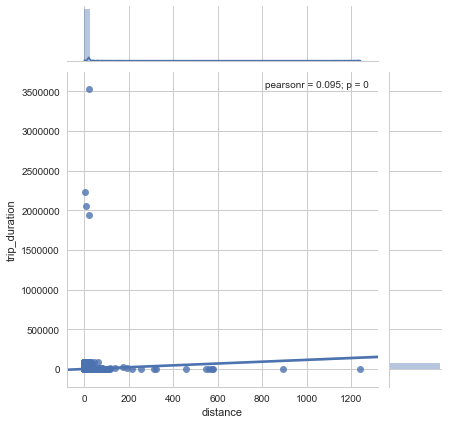

In [71]:
 ## distance와 trip_duration의 jointplot
ax1 = sns.jointplot(taxi1['distance'], taxi1['trip_duration'], kind = 'reg')

plt.show()

In [ ]:
Outlier 제거 필요 

# 4 Data Cleaning

## 3.1 Passenger counter가 0 데이터

In [63]:
taxi_p0 = taxi1.loc[taxi1.passenger_count == 0]
taxi_p0['trip_duration'].describe()

count       60.000000
mean      1718.433333
std      11072.157098
min          1.000000
25%          6.750000
50%         20.500000
75%         92.250000
max      85901.000000
Name: trip_duration, dtype: float64

In [64]:
taxi_p0['distance'].describe()

count    60.000000
mean      1.246954
std       3.520002
min       0.000000
25%       0.001426
50%       0.007287
75%       0.137650
max      19.013222
Name: distance, dtype: float64

In [ ]:
승객이 0명인 데이터 수는 60개가 있으며,

duration의 median이 20.5 sec, distance의 median도 0.007 km (7m)로 trip으로서 의미가 없다.

In [77]:
taxi_test = taxi1[taxi1.passenger_count != 0]
len(taxi_test)

1458584

In [70]:
len(taxi1) - 60

1458584

## 3.2 Trip_duration 

1일은 86,400초

Trip duration이 $ 10^5 $ 이상인 데이터는 24시간 이상이 소요된 Trip이 된다.


### 3.2.1 24시간 이상 걸린 Trip Duration

- 위도/경도 정보를 확인해서 실제로 장거리 여행이였는지 확인

- 그것이 아니라면 Outlier로 판단할 수 있다.

In [74]:
taxi1[taxi1['trip_duration'] > 86400]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pick_month,drop_month,pick_week,drop_week,pick_hour,drop_hour,distance
355003,id1864733,1,2016-01-05 00:19:42,2016-01-27 11:08:38,1,-73.789650,40.643559,-73.956810,40.773087,N,1939736,1,1,1,2,0,11,20.148664
680594,id0369307,1,2016-02-13 22:38:00,2016-03-08 15:57:38,2,-73.921677,40.735252,-73.984749,40.759979,N,2049578,2,3,5,1,22,15,5.982487
924150,id1325766,1,2016-01-05 06:14:15,2016-01-31 01:01:07,1,-73.983788,40.742325,-73.985489,40.727676,N,2227612,1,1,1,6,6,1,1.635128
978383,id0053347,1,2016-02-13 22:46:52,2016-03-25 18:18:14,1,-73.783905,40.648632,-73.978271,40.750202,N,3526282,2,3,5,4,22,18,19.900661


Passenger count vs trip_duration 그래프에서 볼 수 있는 Passenger 1의 3개와 passenger 2의 1개 데이터가 1일 이상의 시간소요를 보여준 여행이다.

시간소요 대비 거리는 20km, 5km, 1.6km, 19km로 4개의 데이터는 합리적이지 않은 데이터로 Outlier로 판단

In [78]:
taxi_test = taxi_test[taxi_test['trip_duration'] < 86400]
len(taxi_test)

1458580

### 3.2.2 1분보다 짧게 걸린 Trip Duration

## 3.3  Zero-Distance

### Test Regression